In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import math
import glob

In [18]:
def sMAPE(a, b):
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [19]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [26]:
def basic_avg(df):
    
    df['tstp'] = pd.to_datetime(df['tstp'],format = '%d/%m/%Y %H:%M')
    
    #Separate into train and test
    print('separating into train and test')
    train = df[:33600]
    test = df[33600:]
    y_test = test['energy(kWh/hh)'].to_list()
               
    # groupby (in our case this is the prediction)
    print('Predicting')
    prediction_hh = []
    mean = train["energy(kWh/hh)"].mean()
    prediction_hh.append(mean)
    #Since our test is 4 weeks long, our prediction has to be 4 weeks long
    y_pred = prediction_hh*2928   
        
    #Metrics
    print('Calculating metrics')
    mape_i = sMAPE(y_test,y_pred)
    rmsle_i = rmsle(y_test,y_pred)
    
    return mape_i, rmsle_i
    

In [27]:
# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
mape_t = []
rmsle_t = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    mape_i,rmsle_i = basic_avg(df)
    mape_t.append(mape_i)
    rmsle_t.append(rmsle_i)
    i = i + 1
    print('filename number ' + str(i))

separating into train and test
Predicting
Calculating metrics
filename number 1
separating into train and test
Predicting
Calculating metrics
filename number 2
separating into train and test
Predicting
Calculating metrics
filename number 3
separating into train and test
Predicting
Calculating metrics
filename number 4
separating into train and test
Predicting
Calculating metrics
filename number 5
separating into train and test
Predicting
Calculating metrics
filename number 6
separating into train and test
Predicting
Calculating metrics
filename number 7
separating into train and test
Predicting
Calculating metrics
filename number 8
separating into train and test
Predicting
Calculating metrics
filename number 9
separating into train and test
Predicting
Calculating metrics
filename number 10
separating into train and test
Predicting
Calculating metrics
filename number 11
separating into train and test
Predicting
Calculating metrics
filename number 12
separating into train and test
Predic

separating into train and test
Predicting
Calculating metrics
filename number 103
separating into train and test
Predicting
Calculating metrics
filename number 104
separating into train and test
Predicting
Calculating metrics
filename number 105
separating into train and test
Predicting
Calculating metrics
filename number 106
separating into train and test
Predicting
Calculating metrics
filename number 107
separating into train and test
Predicting
Calculating metrics
filename number 108
separating into train and test
Predicting
Calculating metrics
filename number 109
separating into train and test
Predicting
Calculating metrics
filename number 110
separating into train and test
Predicting
Calculating metrics
filename number 111
separating into train and test
Predicting
Calculating metrics
filename number 112
separating into train and test
Predicting
Calculating metrics
filename number 113
separating into train and test
Predicting
Calculating metrics
filename number 114
separating into 

separating into train and test
Predicting
Calculating metrics
filename number 203
separating into train and test
Predicting
Calculating metrics
filename number 204
separating into train and test
Predicting
Calculating metrics
filename number 205
separating into train and test
Predicting
Calculating metrics
filename number 206
separating into train and test
Predicting
Calculating metrics
filename number 207
separating into train and test
Predicting
Calculating metrics
filename number 208
separating into train and test
Predicting
Calculating metrics
filename number 209
separating into train and test
Predicting
Calculating metrics
filename number 210
separating into train and test
Predicting
Calculating metrics
filename number 211
separating into train and test
Predicting
Calculating metrics
filename number 212
separating into train and test
Predicting
Calculating metrics
filename number 213
separating into train and test
Predicting
Calculating metrics
filename number 214
separating into 

separating into train and test
Predicting
Calculating metrics
filename number 304
separating into train and test
Predicting
Calculating metrics
filename number 305
separating into train and test
Predicting
Calculating metrics
filename number 306
separating into train and test
Predicting
Calculating metrics
filename number 307
separating into train and test
Predicting
Calculating metrics
filename number 308
separating into train and test
Predicting
Calculating metrics
filename number 309
separating into train and test
Predicting
Calculating metrics
filename number 310
separating into train and test
Predicting
Calculating metrics
filename number 311
separating into train and test
Predicting
Calculating metrics
filename number 312
separating into train and test
Predicting
Calculating metrics
filename number 313
separating into train and test
Predicting
Calculating metrics
filename number 314
separating into train and test
Predicting
Calculating metrics
filename number 315
separating into 

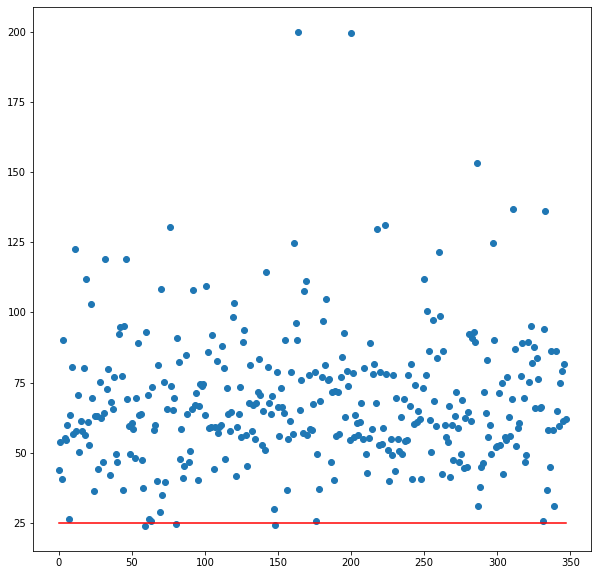

In [44]:
plt.figure(figsize = (10,10))
plt.scatter(range(348),mape_t)
plt.plot(range(348),[25]*348,color = 'red')
plt.show()

In [ ]:
plt.figure(figsize = (7,7))
plt.hist(mape_t)
plt.show()

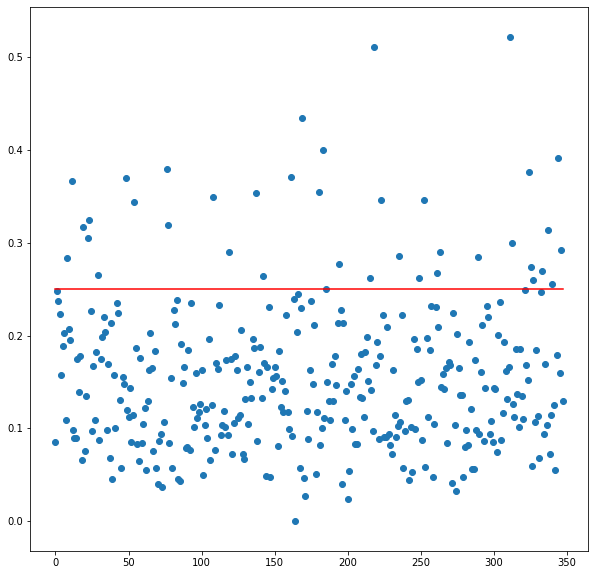

In [43]:
plt.figure(figsize = (10,10))
plt.scatter(range(348),rmsle_t)
plt.plot(range(348),[0.25]*348,color = 'red')
plt.show()

In [ ]:
plt.figure(figsize = (7,7))
plt.hist(rmsle_t)
plt.show()